<a href="https://colab.research.google.com/github/preetamjumech/DL_DNN_from_Sctrach/blob/main/Preetam_Saha_30_08_2022_DNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
#.pt means pytorch files (dump of data here both .pt files, just to import those data by torch.load)
!wget https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/training.pt
!wget https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/test.pt


--2022-08-30 08:10:17--  https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt [following]
--2022-08-30 08:10:17--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47520431 (45M) [application/octet-stream]
Saving to: ‘training.pt.1’

training.pt.1       100%[===================

In [87]:
#tensors and arrays are interchangable
#only some extra functions are added to the tensors, some computational graphs are avl to the tensors


In [88]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [89]:
x_train, y_train = torch.load("training.pt") #tuple

In [90]:
x_train.shape #multidimensional tensor

torch.Size([60000, 28, 28])

In [91]:
from google.colab.patches import cv2_imshow

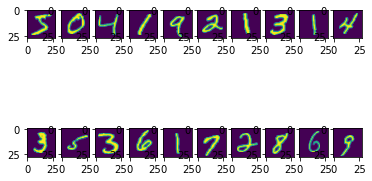

In [92]:
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.imshow(x_train[i].numpy()) #cv2_imshow is applicable to numpy, so converting tensors to numpy

In [93]:
y_train.shape #1D tensor

torch.Size([60000])

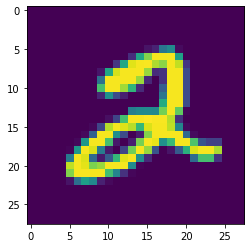

In [94]:
plt.imshow(x_train[5]) #tensors are lying in the physical ram, memory

In [95]:
#mlp is global in nature, cnn is localized , its approaches is local
#mlp cant work with array(cant be greater than 2D, means 3D,4D), it should be converted to matrix(2D)

x_train = x_train.reshape(-1,28*28) #from 3D to 2D,  bydefault dimension orientation

In [96]:
print(x_train.reshape(-1,28*28).shape) #for image origin is upper left 
print(x_train.reshape(-1,14*14).shape)

torch.Size([60000, 784])
torch.Size([240000, 196])


In [97]:
x_train[:3] #2D array, basically a matrix, can be fetched into mlp architechture

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [98]:
x_test, y_test = torch.load("test.pt")

In [99]:
x_test = x_test.reshape(-1,28*28)

In [100]:
from torch.utils.data import TensorDataset, DataLoader

In [101]:
#supplying the image into mlp, its mandatory to supply as tensors not as array, here it is already tensors, but if not convert it
#Tensordataset is just to make a sequence of all dataset, (like stack) so that GPU can be called , nice structure understandable by torch platform
train_loader = DataLoader(TensorDataset(x_train.float(),y_train),
                                       batch_size=64,shuffle = True)
#shuffling is only required for training
#tensor is not good dealing with integer, must be converted to float
test_loader = DataLoader(TensorDataset(x_test.float(),y_test),
                                      batch_size = 64,shuffle = False)

In [102]:
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.nn.modules import dropout

In [103]:
#torch.tensor(array) when to convert the pic from memory into tensor

In [123]:
class MNIST_DNN(nn.Module): #nn.module its the class, all the layers,activation are inheriting
  def __init__(self):
    super(MNIST_DNN,self).__init__() #this line linkds MNIST_DNN to nn.module by calling __init__()
    self.h1 = nn.Linear(in_features=28*28,out_features=512) #linear means here dense in torch like dense in tensorflow
    self.h2 = nn.Linear(in_features=512,out_features=256)
    self.bn = nn.BatchNorm1d(num_features=256) #1D array Iam supplying, so 1D batchnormalization, if I have to supply a pic, 2D, then it will be 2D
    self.h3 = nn.Linear(in_features=256,out_features=128)
    self.dropout = nn.Dropout(p=0.40) #at random 30 percent will be dropout between h3 and h4 , to make model model robust, for regulazation we dropout
    self.h4 = nn.Linear(in_features=128,out_features=32)
    self.out = nn.Linear(in_features=32,out_features=10) #dont shrink less than 10(10 classes are there, that will be severely underfitting)

  # def forward(self,x):
  #   x = self.h1(x)
  #   x = F.relu(x)
  #   x = self.dropout(x)  #no parameter for dropout

  #   x = F.relu(self.h2(x))

  #   x = self.bn(x) #for initialization of bn , two parametres gamma and beta so, initialize every time
  #   x = F.relu(self.h3(x))
  #   x = self.dropout(x)

  #   x = F.relu(self.h4())

  #   x = F.relu(self.out(x))
  #   #x = torch.softmax(x,dim=1)

  #   return x
  def forward(self,x):
    x=self.h1(x)
    x=F.relu(x)
    x=self.dropout(x)
    x=F.relu(self.h2(x))

    x=self.bn(x)
    x=F.relu(self.h3(x))
    x=self.dropout(x)

    x=F.relu(self.h4(x))
    x=self.dropout(x)

    x=F.relu(self.out(x))
    #x=torch.softmax(x,dim=1)

    return x

In [124]:
model_DNN =  MNIST_DNN()

In [125]:
list(model_DNN.parameters())

[Parameter containing:
 tensor([[ 0.0088, -0.0279, -0.0019,  ..., -0.0154,  0.0204,  0.0213],
         [ 0.0158, -0.0286,  0.0203,  ...,  0.0134,  0.0041, -0.0227],
         [-0.0024,  0.0060,  0.0184,  ...,  0.0016, -0.0079, -0.0352],
         ...,
         [-0.0199,  0.0132,  0.0257,  ..., -0.0169,  0.0022, -0.0096],
         [-0.0169,  0.0026, -0.0276,  ...,  0.0001, -0.0063,  0.0086],
         [ 0.0262,  0.0142,  0.0294,  ..., -0.0185, -0.0164,  0.0183]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0213, -0.0340,  0.0200, -0.0198, -0.0231,  0.0176, -0.0031,  0.0189,
         -0.0120, -0.0117,  0.0191,  0.0257, -0.0356, -0.0312,  0.0175,  0.0233,
          0.0303,  0.0305,  0.0171,  0.0212, -0.0252, -0.0238, -0.0316,  0.0270,
          0.0299, -0.0219, -0.0127,  0.0334,  0.0280,  0.0144, -0.0175, -0.0314,
         -0.0133, -0.0172, -0.0092,  0.0030, -0.0317, -0.0007, -0.0312,  0.0058,
          0.0259,  0.0227,  0.0168, -0.0127,  0.0307,  0.0314, -0.0213,  0.0013,

In [126]:
opt = Adam(model_DNN.parameters(),lr = 0.001)

In [127]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [128]:
model_DNN = model_DNN.to(device) #model and data are shifting to gpu, massive parallelization can take place

In [129]:
#it gives more flexibility in fit , learning arte itself can be chnaged, so torch is more flexible than tensorflow
for epoch in range(30):
  training_loss = 0.0
  for batch, target in train_loader: #train_loader is a generator (bathc=mini batch,target = target)
    batch=batch.to(device) #batch is a tensor,(not numpy) so can be shifted to gpu
    target = target.to(device)
    #print(batch.shape)
    
    #---- The Learning Phase ------#
    opt.zero_grad() #removing all the calculated residual gradients after every batch, each batch is independent, gradients are calculated newly
    output =  model_DNN(batch) #calculating output
    loss = F.cross_entropy(output,target) #in torch just cross entropy
    loss.backward() #gradients are calcuated, whether it is rmsProp, Adam anything
    opt.step() #weights are upodated
    #---- The Learning Phase ------#
    training_loss += loss.item() #actual value of loss
  
  val_loss = 0.0
  for val_batch, val_target in test_loader:
    val_batch = val_batch.to(device)
    val_target = val_target.to(device)
    pred = model_DNN(val_batch)
    loss_val = F.cross_entropy(pred,val_target)
    val_loss += loss_val.item()

  if (epoch+1) % 5 ==0:
    print(f"Training Loss: {training_loss}")
    print(f"Test Loss: {val_loss}")

Training Loss: 140.21595842950046
Test Loss: 26.246933449059725
Training Loss: 95.06415687222034
Test Loss: 22.24703625042457
Training Loss: 70.97013491694815
Test Loss: 23.262531492044218
Training Loss: 59.319071643345524
Test Loss: 22.365305646701017
Training Loss: 55.13681037322385
Test Loss: 21.34860345936613
Training Loss: 45.24363547667599
Test Loss: 20.340063479874516


In [130]:
final_pred_vals = model_DNN(x_test.float().to(device)).detach().cpu().numpy()

In [131]:
preds = np.argmax(final_pred_vals,axis =1)

In [132]:
from  sklearn.metrics import confusion_matrix, accuracy_score

In [133]:
confusion_matrix(preds,y_test)

array([[ 962,    0,    1,    1,    0,    3,    4,    0,    0,    1],
       [   0, 1123,    1,    0,    1,    1,    2,    0,    0,    3],
       [   3,    1, 1014,    5,    1,    0,    0,    8,    4,    1],
       [   1,    1,    6,  994,    0,   26,    1,    3,    5,    9],
       [   1,    1,    1,    0,  957,    0,    4,    2,    2,    7],
       [   2,    0,    0,    1,    0,  844,    5,    0,    3,    2],
       [   0,    1,    0,    0,    7,    4,  937,    0,    0,    1],
       [   4,    1,    5,    4,    1,    0,    1, 1001,    4,    9],
       [   5,    7,    3,    4,    2,   12,    4,    9,  954,   11],
       [   2,    0,    1,    1,   13,    2,    0,    5,    2,  965]])

In [134]:
accuracy_score(preds,y_test)

0.9751

In [135]:
import torchsummary

In [136]:
torchsummary.summary(model_DNN,input_size=(784,)) #more no the parameters, more complex model

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
           Dropout-2                  [-1, 512]               0
            Linear-3                  [-1, 256]         131,328
       BatchNorm1d-4                  [-1, 256]             512
            Linear-5                  [-1, 128]          32,896
           Dropout-6                  [-1, 128]               0
            Linear-7                   [-1, 32]           4,128
           Dropout-8                   [-1, 32]               0
            Linear-9                   [-1, 10]             330
Total params: 571,114
Trainable params: 571,114
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.18
Estimated Total Size (MB): 2.20
-------------------------------------------

In [ ]:
#in case of cnn, no of parameters will be drastically down. 